In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Modeling

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings 

In [14]:
df = pd.read_csv("stud.csv")

In [15]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Preparing X and Y variables

In [16]:
x= df.drop(columns=['math_score'],axis=1)

In [17]:
x.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [18]:
print("categories in 'gender' variable: ",end = " ")
print(df['gender'].unique())


print("categories in 'race_ethnicity' variable:",end = " ")
print(df['race_ethnicity'].unique())


print("categories in 'parental_level_of_education' variable",end = " ")
print(df['parental_level_of_education'].unique())


print("categories in 'lunch' variable:",end = " ")
print(df['lunch'].unique())


print("categories in 'test_preparation_course' variable",end = " ")
print(df['test_preparation_course'].unique())

categories in 'gender' variable:  ['female' 'male']
categories in 'race_ethnicity' variable: ['group B' 'group C' 'group A' 'group D' 'group E']
categories in 'parental_level_of_education' variable ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories in 'lunch' variable: ['standard' 'free/reduced']
categories in 'test_preparation_course' variable ['none' 'completed']


In [19]:
y = df['math_score']

In [20]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [23]:
num_features = x.select_dtypes(exclude="object").columns
cat_features = x.select_dtypes(include= "object").columns


from sklearn.preprocessing import OneHotEncoder , StandardScaler
from sklearn.compose import ColumnTransformer


numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(



[
    ("OneHotEncoder", oh_transformer,cat_features),
    ("StandardScaler", numeric_transformer, num_features),
    
    
]

    
)

In [24]:
x = preprocessor.fit_transform(x)

In [25]:
x.shape

(1000, 19)

In [27]:
# seperate dataset into train and test

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2,random_state=42)
X_train.shape , X_test.shape

((800, 19), (200, 19))

## Create and Evaluate Function to give all metrics after model Training

In [28]:
def evaluate_model (true,predicted):
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted)
    rmse = np.sqrt(mean_squared_error(true,predicted))
    r2_square = r2_score(true,predicted)
    return mae , rmse , r2_square

In [31]:
models = {
    "Linear Regression": KNeighborsRegressor(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regeessor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor (verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
    
}
model_list = []
r2_list = []


for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train , Y_train) # Train model
    
    
    # Make Predictions
    Y_train_pred = model.predict(X_train)
    Y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse , model_train_r2 = evaluate_model(Y_train , Y_train_pred)
    
    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(Y_test , Y_test_pred)
    
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    
    
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:4f}".format(model_train_r2))
    
    
    print('----------------------------')
    
    
    print('Model Performance for Test set')
    print("- Root Mean Squared Error:{:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error:{:.4f}".format(model_test_mae))
    print("- R2 Score:{:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.7055
- Mean Absolute Error: 4.5122
- R2 Score: 0.855610
----------------------------
Model Performance for Test set
- Root Mean Squared Error:7.2634
- Mean Absolute Error:5.6590
- R2 Score:0.7832


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
- R2 Score: 0.807146
----------------------------
Model Performance for Test set
- Root Mean Squared Error:6.5197
- Mean Absolute Error:5.1579
- R2 Score:0.8253


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 4.2650
- R2 Score: 0.874304
----------------------------
Model Performance for Test set
- Root Mean Squared Error:5.3904
- Mean Absolute Error:4.2111
- R2 Score:0.8806


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.7055
- Mean Absolute Error: 4.5122
- R2 Score: 0.855610
----------------------------
Model Perform

## Results

In [32]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name','R2_score']).sort_values(by=["R2_score"],ascending=False)

,Model Name,R2_score
2,Ridge,0.880593
7,CatBoosting Regressor,0.851632
5,Random Forest Regeessor,0.850847
8,AdaBoost Regressor,0.847908
1,Lasso,0.825320
6,XGBRegressor,0.821589
0,Linear Regression,0.783193
3,K-Neighbors Regressor,0.783193
4,Decision Tree,0.750245


## Linear Regression

In [33]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, Y_train)
Y_pred = lin_model.predict(X_test)
score = r2_score(Y_test, Y_pred)*100
print("Accuracy of the model is %.2f" %score)

Accuracy of the model is 87.92


## Plot y_pred and y_test

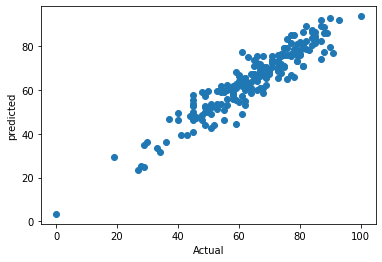

In [35]:
plt.scatter(Y_test,Y_pred);
plt.xlabel('Actual');
plt.ylabel('predicted');

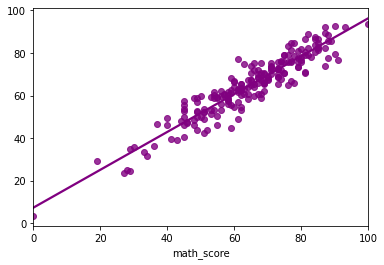

In [37]:
sns.regplot(x=Y_test,y=Y_pred,ci=None,color='purple');

## Difference between Actual and Predicted Values

In [39]:
pred_df=pd.DataFrame({'Actual Value':Y_test, 'predicted value':Y_pred, 'Difference':Y_test-Y_pred})
pred_df

,Actual Value,predicted value,Difference
521,91,76.6250,14.3750
737,53,59.3750,-6.3750
740,80,76.5000,3.5000
660,74,76.2500,-2.2500
411,84,87.4375,-3.4375
...,...,...,...
408,52,43.8750,8.1250
332,62,62.6250,-0.6250
208,74,67.9375,6.0625
613,65,67.2500,-2.2500
